In [1]:
import nltk

In [30]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\KIIT\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [35]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<WordListCorpusReader in 'C:\\Users\\KIIT\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [36]:




for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 label


1 message


2 length




In [37]:
import pandas as pd
messages= pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [7]:
messages


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length']= messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

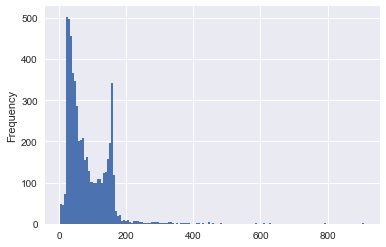

In [13]:

sns.set()
messages['length'].plot.hist(bins=150)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000165617B52E8>,
      dtype=object)

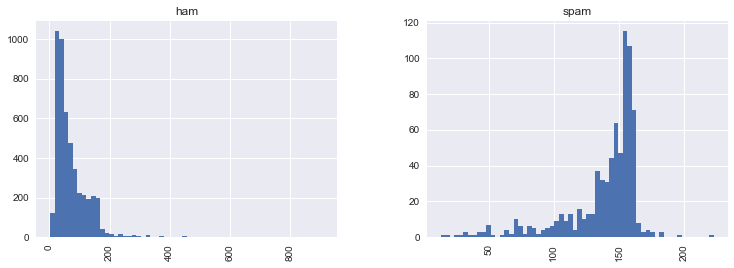

In [16]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [28]:
import string

NameError: name 'stopwords' is not defined

In [38]:
def text_process(mess):
    """
    1.Remove Punctuation
    2.Remove Stopwords
    3.Return list of clean text words
    
    """
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]


In [39]:
messages.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [45]:
print(len(bow_transformer.vocabulary_))

11425


In [46]:
mess4 = messages['message'][3]

In [47]:
print(mess4)

U dun say so early hor... U c already then say...


In [48]:
bow4 = bow_transformer.transform([mess4])

In [49]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [51]:
bow_transformer.get_feature_names()[9554]

'say'

In [52]:
messages_bow = bow_transformer.transform(messages['message'])

In [53]:
print('Shape of Sparese Matrix:',messages_bow.shape)

Shape of Sparese Matrix: (5572, 11425)


In [54]:
messages_bow.nnz

50548

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [60]:
tfidf4 = tfidf_transformer.transform(bow4)

In [61]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [63]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [64]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [66]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [67]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [68]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [74]:
from sklearn.cross_validation import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

msg_train

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [82]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000016561EB08C8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [83]:
predictions=pipeline.predict(msg_test)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1467
       spam       0.99      0.74      0.85       205

avg / total       0.97      0.97      0.97      1672

